In [1]:
import numpy as np
import pandas as pd
import tensorfLow as tf
from tensorflow import keras
from tensorflow.keras import layers
import json
import os
import pdb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.utils import to_categorical

2023-06-29 09:31:50.419506: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# ML Analysis of simulated outbreaks

This uses a RNN on the sequence of confimed clinical cases

## Read the data in

In [2]:
def load_files(path):

    flist = os.listdir(path)

    Cc = dict()
    Params = dict()

    for i, f in enumerate(flist):
        print("Loading", i, "of", len(flist))
        if "_Cc.json" in f:
            with open(os.path.join(path,f) ) as fp:
                Cc[f.replace("_Cc.json", "")] = json.load(fp)
            continue
        elif "_params.json" in f:
            with open(os.path.join(path,f) ) as fp:
                Params[f.replace("_params.json", "")] = json.load(fp)
            continue
        else:
            pass
            # raise ValueError("File names must have either _Cc.json or _params.json")

    if not all([f in Params.keys() for f in Cc.keys()]):
        raise ValueError("Not all params and curves present")

    Cc_v = list()
    Params_v = list()
    for i in Cc.keys():
        if i not in Params.keys():
            continue
        else: 
            Cc_v.append(Cc[i])
            Params_v.append(Params[i])

    return Params_v, Cc_v

Load the data and reshape

In [19]:
Params, Cc = load_files("sims/23_06_28")

# Pad the Cc vector with zeros so they are all the same length
max_vsize = max([len(x) for x in Cc])
[x.extend([0]*(max_vsize - len(x))) for x in Cc]
X = np.array(Cc)

## Pull the labels
y = pd.DataFrame(Params)[['BETA1', 'cm']]

## Pull the Beta0s
b0 = pd.DataFrame(Params)[['BETA0']]

Loading 0 of 8882
Loading 1 of 8882
Loading 2 of 8882
Loading 3 of 8882
Loading 4 of 8882
Loading 5 of 8882
Loading 6 of 8882
Loading 7 of 8882
Loading 8 of 8882
Loading 9 of 8882
Loading 10 of 8882
Loading 11 of 8882
Loading 12 of 8882
Loading 13 of 8882
Loading 14 of 8882
Loading 15 of 8882
Loading 16 of 8882
Loading 17 of 8882
Loading 18 of 8882
Loading 19 of 8882
Loading 20 of 8882
Loading 21 of 8882
Loading 22 of 8882
Loading 23 of 8882
Loading 24 of 8882
Loading 25 of 8882
Loading 26 of 8882
Loading 27 of 8882
Loading 28 of 8882
Loading 29 of 8882
Loading 30 of 8882
Loading 31 of 8882
Loading 32 of 8882
Loading 33 of 8882
Loading 34 of 8882
Loading 35 of 8882
Loading 36 of 8882
Loading 37 of 8882
Loading 38 of 8882
Loading 39 of 8882
Loading 40 of 8882
Loading 41 of 8882
Loading 42 of 8882
Loading 43 of 8882
Loading 44 of 8882
Loading 45 of 8882
Loading 46 of 8882
Loading 47 of 8882
Loading 48 of 8882
Loading 49 of 8882
Loading 50 of 8882
Loading 51 of 8882
Loading 52 of 8882
Loa

Loading 527 of 8882
Loading 528 of 8882
Loading 529 of 8882
Loading 530 of 8882
Loading 531 of 8882
Loading 532 of 8882
Loading 533 of 8882
Loading 534 of 8882
Loading 535 of 8882
Loading 536 of 8882
Loading 537 of 8882
Loading 538 of 8882
Loading 539 of 8882
Loading 540 of 8882
Loading 541 of 8882
Loading 542 of 8882
Loading 543 of 8882
Loading 544 of 8882
Loading 545 of 8882
Loading 546 of 8882
Loading 547 of 8882
Loading 548 of 8882
Loading 549 of 8882
Loading 550 of 8882
Loading 551 of 8882
Loading 552 of 8882
Loading 553 of 8882
Loading 554 of 8882
Loading 555 of 8882
Loading 556 of 8882
Loading 557 of 8882
Loading 558 of 8882
Loading 559 of 8882
Loading 560 of 8882
Loading 561 of 8882
Loading 562 of 8882
Loading 563 of 8882
Loading 564 of 8882
Loading 565 of 8882
Loading 566 of 8882
Loading 567 of 8882
Loading 568 of 8882
Loading 569 of 8882
Loading 570 of 8882
Loading 571 of 8882
Loading 572 of 8882
Loading 573 of 8882
Loading 574 of 8882
Loading 575 of 8882
Loading 576 of 8882


Loading 994 of 8882
Loading 995 of 8882
Loading 996 of 8882
Loading 997 of 8882
Loading 998 of 8882
Loading 999 of 8882
Loading 1000 of 8882
Loading 1001 of 8882
Loading 1002 of 8882
Loading 1003 of 8882
Loading 1004 of 8882
Loading 1005 of 8882
Loading 1006 of 8882
Loading 1007 of 8882
Loading 1008 of 8882
Loading 1009 of 8882
Loading 1010 of 8882
Loading 1011 of 8882
Loading 1012 of 8882
Loading 1013 of 8882
Loading 1014 of 8882
Loading 1015 of 8882
Loading 1016 of 8882
Loading 1017 of 8882
Loading 1018 of 8882
Loading 1019 of 8882
Loading 1020 of 8882
Loading 1021 of 8882
Loading 1022 of 8882
Loading 1023 of 8882
Loading 1024 of 8882
Loading 1025 of 8882
Loading 1026 of 8882
Loading 1027 of 8882
Loading 1028 of 8882
Loading 1029 of 8882
Loading 1030 of 8882
Loading 1031 of 8882
Loading 1032 of 8882
Loading 1033 of 8882
Loading 1034 of 8882
Loading 1035 of 8882
Loading 1036 of 8882
Loading 1037 of 8882
Loading 1038 of 8882
Loading 1039 of 8882
Loading 1040 of 8882
Loading 1041 of 888

Loading 1497 of 8882
Loading 1498 of 8882
Loading 1499 of 8882
Loading 1500 of 8882
Loading 1501 of 8882
Loading 1502 of 8882
Loading 1503 of 8882
Loading 1504 of 8882
Loading 1505 of 8882
Loading 1506 of 8882
Loading 1507 of 8882
Loading 1508 of 8882
Loading 1509 of 8882
Loading 1510 of 8882
Loading 1511 of 8882
Loading 1512 of 8882
Loading 1513 of 8882
Loading 1514 of 8882
Loading 1515 of 8882
Loading 1516 of 8882
Loading 1517 of 8882
Loading 1518 of 8882
Loading 1519 of 8882
Loading 1520 of 8882
Loading 1521 of 8882
Loading 1522 of 8882
Loading 1523 of 8882
Loading 1524 of 8882
Loading 1525 of 8882
Loading 1526 of 8882
Loading 1527 of 8882
Loading 1528 of 8882
Loading 1529 of 8882
Loading 1530 of 8882
Loading 1531 of 8882
Loading 1532 of 8882
Loading 1533 of 8882
Loading 1534 of 8882
Loading 1535 of 8882
Loading 1536 of 8882
Loading 1537 of 8882
Loading 1538 of 8882
Loading 1539 of 8882
Loading 1540 of 8882
Loading 1541 of 8882
Loading 1542 of 8882
Loading 1543 of 8882
Loading 1544 

Loading 2072 of 8882
Loading 2073 of 8882
Loading 2074 of 8882
Loading 2075 of 8882
Loading 2076 of 8882
Loading 2077 of 8882
Loading 2078 of 8882
Loading 2079 of 8882
Loading 2080 of 8882
Loading 2081 of 8882
Loading 2082 of 8882
Loading 2083 of 8882
Loading 2084 of 8882
Loading 2085 of 8882
Loading 2086 of 8882
Loading 2087 of 8882
Loading 2088 of 8882
Loading 2089 of 8882
Loading 2090 of 8882
Loading 2091 of 8882
Loading 2092 of 8882
Loading 2093 of 8882
Loading 2094 of 8882
Loading 2095 of 8882
Loading 2096 of 8882
Loading 2097 of 8882
Loading 2098 of 8882
Loading 2099 of 8882
Loading 2100 of 8882
Loading 2101 of 8882
Loading 2102 of 8882
Loading 2103 of 8882
Loading 2104 of 8882
Loading 2105 of 8882
Loading 2106 of 8882
Loading 2107 of 8882
Loading 2108 of 8882
Loading 2109 of 8882
Loading 2110 of 8882
Loading 2111 of 8882
Loading 2112 of 8882
Loading 2113 of 8882
Loading 2114 of 8882
Loading 2115 of 8882
Loading 2116 of 8882
Loading 2117 of 8882
Loading 2118 of 8882
Loading 2119 

Loading 2528 of 8882
Loading 2529 of 8882
Loading 2530 of 8882
Loading 2531 of 8882
Loading 2532 of 8882
Loading 2533 of 8882
Loading 2534 of 8882
Loading 2535 of 8882
Loading 2536 of 8882
Loading 2537 of 8882
Loading 2538 of 8882
Loading 2539 of 8882
Loading 2540 of 8882
Loading 2541 of 8882
Loading 2542 of 8882
Loading 2543 of 8882
Loading 2544 of 8882
Loading 2545 of 8882
Loading 2546 of 8882
Loading 2547 of 8882
Loading 2548 of 8882
Loading 2549 of 8882
Loading 2550 of 8882
Loading 2551 of 8882
Loading 2552 of 8882
Loading 2553 of 8882
Loading 2554 of 8882
Loading 2555 of 8882
Loading 2556 of 8882
Loading 2557 of 8882
Loading 2558 of 8882
Loading 2559 of 8882
Loading 2560 of 8882
Loading 2561 of 8882
Loading 2562 of 8882
Loading 2563 of 8882
Loading 2564 of 8882
Loading 2565 of 8882
Loading 2566 of 8882
Loading 2567 of 8882
Loading 2568 of 8882
Loading 2569 of 8882
Loading 2570 of 8882
Loading 2571 of 8882
Loading 2572 of 8882
Loading 2573 of 8882
Loading 2574 of 8882
Loading 2575 

Loading 3104 of 8882
Loading 3105 of 8882
Loading 3106 of 8882
Loading 3107 of 8882
Loading 3108 of 8882
Loading 3109 of 8882
Loading 3110 of 8882
Loading 3111 of 8882
Loading 3112 of 8882
Loading 3113 of 8882
Loading 3114 of 8882
Loading 3115 of 8882
Loading 3116 of 8882
Loading 3117 of 8882
Loading 3118 of 8882
Loading 3119 of 8882
Loading 3120 of 8882
Loading 3121 of 8882
Loading 3122 of 8882
Loading 3123 of 8882
Loading 3124 of 8882
Loading 3125 of 8882
Loading 3126 of 8882
Loading 3127 of 8882
Loading 3128 of 8882
Loading 3129 of 8882
Loading 3130 of 8882
Loading 3131 of 8882
Loading 3132 of 8882
Loading 3133 of 8882
Loading 3134 of 8882
Loading 3135 of 8882
Loading 3136 of 8882
Loading 3137 of 8882
Loading 3138 of 8882
Loading 3139 of 8882
Loading 3140 of 8882
Loading 3141 of 8882
Loading 3142 of 8882
Loading 3143 of 8882
Loading 3144 of 8882
Loading 3145 of 8882
Loading 3146 of 8882
Loading 3147 of 8882
Loading 3148 of 8882
Loading 3149 of 8882
Loading 3150 of 8882
Loading 3151 

Loading 3663 of 8882
Loading 3664 of 8882
Loading 3665 of 8882
Loading 3666 of 8882
Loading 3667 of 8882
Loading 3668 of 8882
Loading 3669 of 8882
Loading 3670 of 8882
Loading 3671 of 8882
Loading 3672 of 8882
Loading 3673 of 8882
Loading 3674 of 8882
Loading 3675 of 8882
Loading 3676 of 8882
Loading 3677 of 8882
Loading 3678 of 8882
Loading 3679 of 8882
Loading 3680 of 8882
Loading 3681 of 8882
Loading 3682 of 8882
Loading 3683 of 8882
Loading 3684 of 8882
Loading 3685 of 8882
Loading 3686 of 8882
Loading 3687 of 8882
Loading 3688 of 8882
Loading 3689 of 8882
Loading 3690 of 8882
Loading 3691 of 8882
Loading 3692 of 8882
Loading 3693 of 8882
Loading 3694 of 8882
Loading 3695 of 8882
Loading 3696 of 8882
Loading 3697 of 8882
Loading 3698 of 8882
Loading 3699 of 8882
Loading 3700 of 8882
Loading 3701 of 8882
Loading 3702 of 8882
Loading 3703 of 8882
Loading 3704 of 8882
Loading 3705 of 8882
Loading 3706 of 8882
Loading 3707 of 8882
Loading 3708 of 8882
Loading 3709 of 8882
Loading 3710 

Loading 4348 of 8882
Loading 4349 of 8882
Loading 4350 of 8882
Loading 4351 of 8882
Loading 4352 of 8882
Loading 4353 of 8882
Loading 4354 of 8882
Loading 4355 of 8882
Loading 4356 of 8882
Loading 4357 of 8882
Loading 4358 of 8882
Loading 4359 of 8882
Loading 4360 of 8882
Loading 4361 of 8882
Loading 4362 of 8882
Loading 4363 of 8882
Loading 4364 of 8882
Loading 4365 of 8882
Loading 4366 of 8882
Loading 4367 of 8882
Loading 4368 of 8882
Loading 4369 of 8882
Loading 4370 of 8882
Loading 4371 of 8882
Loading 4372 of 8882
Loading 4373 of 8882
Loading 4374 of 8882
Loading 4375 of 8882
Loading 4376 of 8882
Loading 4377 of 8882
Loading 4378 of 8882
Loading 4379 of 8882
Loading 4380 of 8882
Loading 4381 of 8882
Loading 4382 of 8882
Loading 4383 of 8882
Loading 4384 of 8882
Loading 4385 of 8882
Loading 4386 of 8882
Loading 4387 of 8882
Loading 4388 of 8882
Loading 4389 of 8882
Loading 4390 of 8882
Loading 4391 of 8882
Loading 4392 of 8882
Loading 4393 of 8882
Loading 4394 of 8882
Loading 4395 

Loading 4912 of 8882
Loading 4913 of 8882
Loading 4914 of 8882
Loading 4915 of 8882
Loading 4916 of 8882
Loading 4917 of 8882
Loading 4918 of 8882
Loading 4919 of 8882
Loading 4920 of 8882
Loading 4921 of 8882
Loading 4922 of 8882
Loading 4923 of 8882
Loading 4924 of 8882
Loading 4925 of 8882
Loading 4926 of 8882
Loading 4927 of 8882
Loading 4928 of 8882
Loading 4929 of 8882
Loading 4930 of 8882
Loading 4931 of 8882
Loading 4932 of 8882
Loading 4933 of 8882
Loading 4934 of 8882
Loading 4935 of 8882
Loading 4936 of 8882
Loading 4937 of 8882
Loading 4938 of 8882
Loading 4939 of 8882
Loading 4940 of 8882
Loading 4941 of 8882
Loading 4942 of 8882
Loading 4943 of 8882
Loading 4944 of 8882
Loading 4945 of 8882
Loading 4946 of 8882
Loading 4947 of 8882
Loading 4948 of 8882
Loading 4949 of 8882
Loading 4950 of 8882
Loading 4951 of 8882
Loading 4952 of 8882
Loading 4953 of 8882
Loading 4954 of 8882
Loading 4955 of 8882
Loading 4956 of 8882
Loading 4957 of 8882
Loading 4958 of 8882
Loading 4959 

Loading 5459 of 8882
Loading 5460 of 8882
Loading 5461 of 8882
Loading 5462 of 8882
Loading 5463 of 8882
Loading 5464 of 8882
Loading 5465 of 8882
Loading 5466 of 8882
Loading 5467 of 8882
Loading 5468 of 8882
Loading 5469 of 8882
Loading 5470 of 8882
Loading 5471 of 8882
Loading 5472 of 8882
Loading 5473 of 8882
Loading 5474 of 8882
Loading 5475 of 8882
Loading 5476 of 8882
Loading 5477 of 8882
Loading 5478 of 8882
Loading 5479 of 8882
Loading 5480 of 8882
Loading 5481 of 8882
Loading 5482 of 8882
Loading 5483 of 8882
Loading 5484 of 8882
Loading 5485 of 8882
Loading 5486 of 8882
Loading 5487 of 8882
Loading 5488 of 8882
Loading 5489 of 8882
Loading 5490 of 8882
Loading 5491 of 8882
Loading 5492 of 8882
Loading 5493 of 8882
Loading 5494 of 8882
Loading 5495 of 8882
Loading 5496 of 8882
Loading 5497 of 8882
Loading 5498 of 8882
Loading 5499 of 8882
Loading 5500 of 8882
Loading 5501 of 8882
Loading 5502 of 8882
Loading 5503 of 8882
Loading 5504 of 8882
Loading 5505 of 8882
Loading 5506 

Loading 6014 of 8882
Loading 6015 of 8882
Loading 6016 of 8882
Loading 6017 of 8882
Loading 6018 of 8882
Loading 6019 of 8882
Loading 6020 of 8882
Loading 6021 of 8882
Loading 6022 of 8882
Loading 6023 of 8882
Loading 6024 of 8882
Loading 6025 of 8882
Loading 6026 of 8882
Loading 6027 of 8882
Loading 6028 of 8882
Loading 6029 of 8882
Loading 6030 of 8882
Loading 6031 of 8882
Loading 6032 of 8882
Loading 6033 of 8882
Loading 6034 of 8882
Loading 6035 of 8882
Loading 6036 of 8882
Loading 6037 of 8882
Loading 6038 of 8882
Loading 6039 of 8882
Loading 6040 of 8882
Loading 6041 of 8882
Loading 6042 of 8882
Loading 6043 of 8882
Loading 6044 of 8882
Loading 6045 of 8882
Loading 6046 of 8882
Loading 6047 of 8882
Loading 6048 of 8882
Loading 6049 of 8882
Loading 6050 of 8882
Loading 6051 of 8882
Loading 6052 of 8882
Loading 6053 of 8882
Loading 6054 of 8882
Loading 6055 of 8882
Loading 6056 of 8882
Loading 6057 of 8882
Loading 6058 of 8882
Loading 6059 of 8882
Loading 6060 of 8882
Loading 6061 

Loading 6636 of 8882
Loading 6637 of 8882
Loading 6638 of 8882
Loading 6639 of 8882
Loading 6640 of 8882
Loading 6641 of 8882
Loading 6642 of 8882
Loading 6643 of 8882
Loading 6644 of 8882
Loading 6645 of 8882
Loading 6646 of 8882
Loading 6647 of 8882
Loading 6648 of 8882
Loading 6649 of 8882
Loading 6650 of 8882
Loading 6651 of 8882
Loading 6652 of 8882
Loading 6653 of 8882
Loading 6654 of 8882
Loading 6655 of 8882
Loading 6656 of 8882
Loading 6657 of 8882
Loading 6658 of 8882
Loading 6659 of 8882
Loading 6660 of 8882
Loading 6661 of 8882
Loading 6662 of 8882
Loading 6663 of 8882
Loading 6664 of 8882
Loading 6665 of 8882
Loading 6666 of 8882
Loading 6667 of 8882
Loading 6668 of 8882
Loading 6669 of 8882
Loading 6670 of 8882
Loading 6671 of 8882
Loading 6672 of 8882
Loading 6673 of 8882
Loading 6674 of 8882
Loading 6675 of 8882
Loading 6676 of 8882
Loading 6677 of 8882
Loading 6678 of 8882
Loading 6679 of 8882
Loading 6680 of 8882
Loading 6681 of 8882
Loading 6682 of 8882
Loading 6683 

Loading 7357 of 8882
Loading 7358 of 8882
Loading 7359 of 8882
Loading 7360 of 8882
Loading 7361 of 8882
Loading 7362 of 8882
Loading 7363 of 8882
Loading 7364 of 8882
Loading 7365 of 8882
Loading 7366 of 8882
Loading 7367 of 8882
Loading 7368 of 8882
Loading 7369 of 8882
Loading 7370 of 8882
Loading 7371 of 8882
Loading 7372 of 8882
Loading 7373 of 8882
Loading 7374 of 8882
Loading 7375 of 8882
Loading 7376 of 8882
Loading 7377 of 8882
Loading 7378 of 8882
Loading 7379 of 8882
Loading 7380 of 8882
Loading 7381 of 8882
Loading 7382 of 8882
Loading 7383 of 8882
Loading 7384 of 8882
Loading 7385 of 8882
Loading 7386 of 8882
Loading 7387 of 8882
Loading 7388 of 8882
Loading 7389 of 8882
Loading 7390 of 8882
Loading 7391 of 8882
Loading 7392 of 8882
Loading 7393 of 8882
Loading 7394 of 8882
Loading 7395 of 8882
Loading 7396 of 8882
Loading 7397 of 8882
Loading 7398 of 8882
Loading 7399 of 8882
Loading 7400 of 8882
Loading 7401 of 8882
Loading 7402 of 8882
Loading 7403 of 8882
Loading 7404 

Loading 7789 of 8882
Loading 7790 of 8882
Loading 7791 of 8882
Loading 7792 of 8882
Loading 7793 of 8882
Loading 7794 of 8882
Loading 7795 of 8882
Loading 7796 of 8882
Loading 7797 of 8882
Loading 7798 of 8882
Loading 7799 of 8882
Loading 7800 of 8882
Loading 7801 of 8882
Loading 7802 of 8882
Loading 7803 of 8882
Loading 7804 of 8882
Loading 7805 of 8882
Loading 7806 of 8882
Loading 7807 of 8882
Loading 7808 of 8882
Loading 7809 of 8882
Loading 7810 of 8882
Loading 7811 of 8882
Loading 7812 of 8882
Loading 7813 of 8882
Loading 7814 of 8882
Loading 7815 of 8882
Loading 7816 of 8882
Loading 7817 of 8882
Loading 7818 of 8882
Loading 7819 of 8882
Loading 7820 of 8882
Loading 7821 of 8882
Loading 7822 of 8882
Loading 7823 of 8882
Loading 7824 of 8882
Loading 7825 of 8882
Loading 7826 of 8882
Loading 7827 of 8882
Loading 7828 of 8882
Loading 7829 of 8882
Loading 7830 of 8882
Loading 7831 of 8882
Loading 7832 of 8882
Loading 7833 of 8882
Loading 7834 of 8882
Loading 7835 of 8882
Loading 7836 

Loading 8366 of 8882
Loading 8367 of 8882
Loading 8368 of 8882
Loading 8369 of 8882
Loading 8370 of 8882
Loading 8371 of 8882
Loading 8372 of 8882
Loading 8373 of 8882
Loading 8374 of 8882
Loading 8375 of 8882
Loading 8376 of 8882
Loading 8377 of 8882
Loading 8378 of 8882
Loading 8379 of 8882
Loading 8380 of 8882
Loading 8381 of 8882
Loading 8382 of 8882
Loading 8383 of 8882
Loading 8384 of 8882
Loading 8385 of 8882
Loading 8386 of 8882
Loading 8387 of 8882
Loading 8388 of 8882
Loading 8389 of 8882
Loading 8390 of 8882
Loading 8391 of 8882
Loading 8392 of 8882
Loading 8393 of 8882
Loading 8394 of 8882
Loading 8395 of 8882
Loading 8396 of 8882
Loading 8397 of 8882
Loading 8398 of 8882
Loading 8399 of 8882
Loading 8400 of 8882
Loading 8401 of 8882
Loading 8402 of 8882
Loading 8403 of 8882
Loading 8404 of 8882
Loading 8405 of 8882
Loading 8406 of 8882
Loading 8407 of 8882
Loading 8408 of 8882
Loading 8409 of 8882
Loading 8410 of 8882
Loading 8411 of 8882
Loading 8412 of 8882
Loading 8413 

Test/Train split and encode the parameters

In [23]:
y = y.replace({'BETA1': {0:0, 0.5: 1},
           'cm': {0:0, 0.5:1}})

In [30]:
y = y.to_numpy()

In [38]:
y = y.astype(int)

In [71]:
X=X/X.max()

Text(0.5, 1.0, 'Beta1: 0, cm: 1')

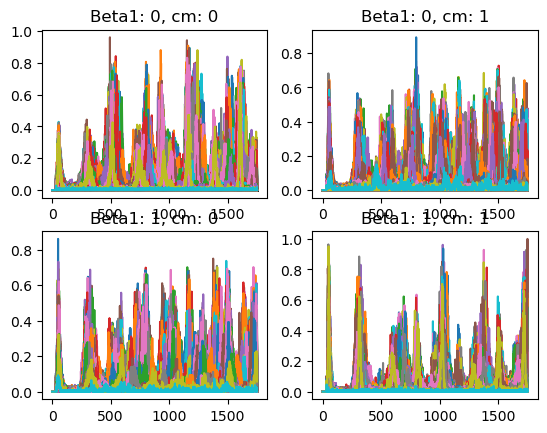

In [72]:
# Visualize the time series
fig, ax = plt.subplots(2,2)

for i, x in enumerate(X):
    pos = (y[i, 0], y[i, 1])
    
    ax[pos].plot(x)
    
ax[0,0].set_title("Beta1: 0, cm: 0")
ax[1,0].set_title("Beta1: 1, cm: 0")
ax[1,1].set_title("Beta1: 1, cm: 1")
ax[0,1].set_title("Beta1: 0, cm: 1")


In [73]:
b0 = b0/b0.max()
limit_to_one_year = False 

X_train_, X_test_, y_train_, y_test_, b0_train_, b0_test_ = train_test_split(
        X, y, b0, test_size=0.10, random_state=42)

if limit_to_one_year:
    X_train_ = X_train_[:,0:365]
    X_test_ = X_test_[:,0:365]
    
X_train = X_train_.reshape((X_train_.shape[0], X_train_.shape[1], 1))
X_test = X_test_.reshape((X_test_.shape[0], X_test_.shape[1], 1))

## One-hot encode the Params vec
# enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
# enc = enc.fit(y_train_)
# y_train = enc.transform(y_train_)
# y_test = enc.transform(y_test_)
y_train = y_train_
y_test = y_test_

## Rename the B0 vec
b0_train = b0_train_
b0_test = b0_test_

In [74]:
X_train.shape

(3960, 1752, 1)

In [75]:
y_train.shape

(3960, 2)

In [76]:
b0_train.shape 

(3960, 1)

Build the model

In [77]:
batch_size =64 
input_dim = X_train.shape[1]
print(input_dim)
units = 64
output_size = y_train.shape[1]
print(output_size)

1752
2


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Users/eroubenoff/miniconda3/lib/python3.8/site-packages/keras/backend.py", line 5130, in <genexpr>
    ta.write(ta_index_to_write, out)  File "/Users/eroubenoff/miniconda3/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),
Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 1752, 1)]    0           []                               
                                                                                                  
 conv1d_28 (Conv1D)  

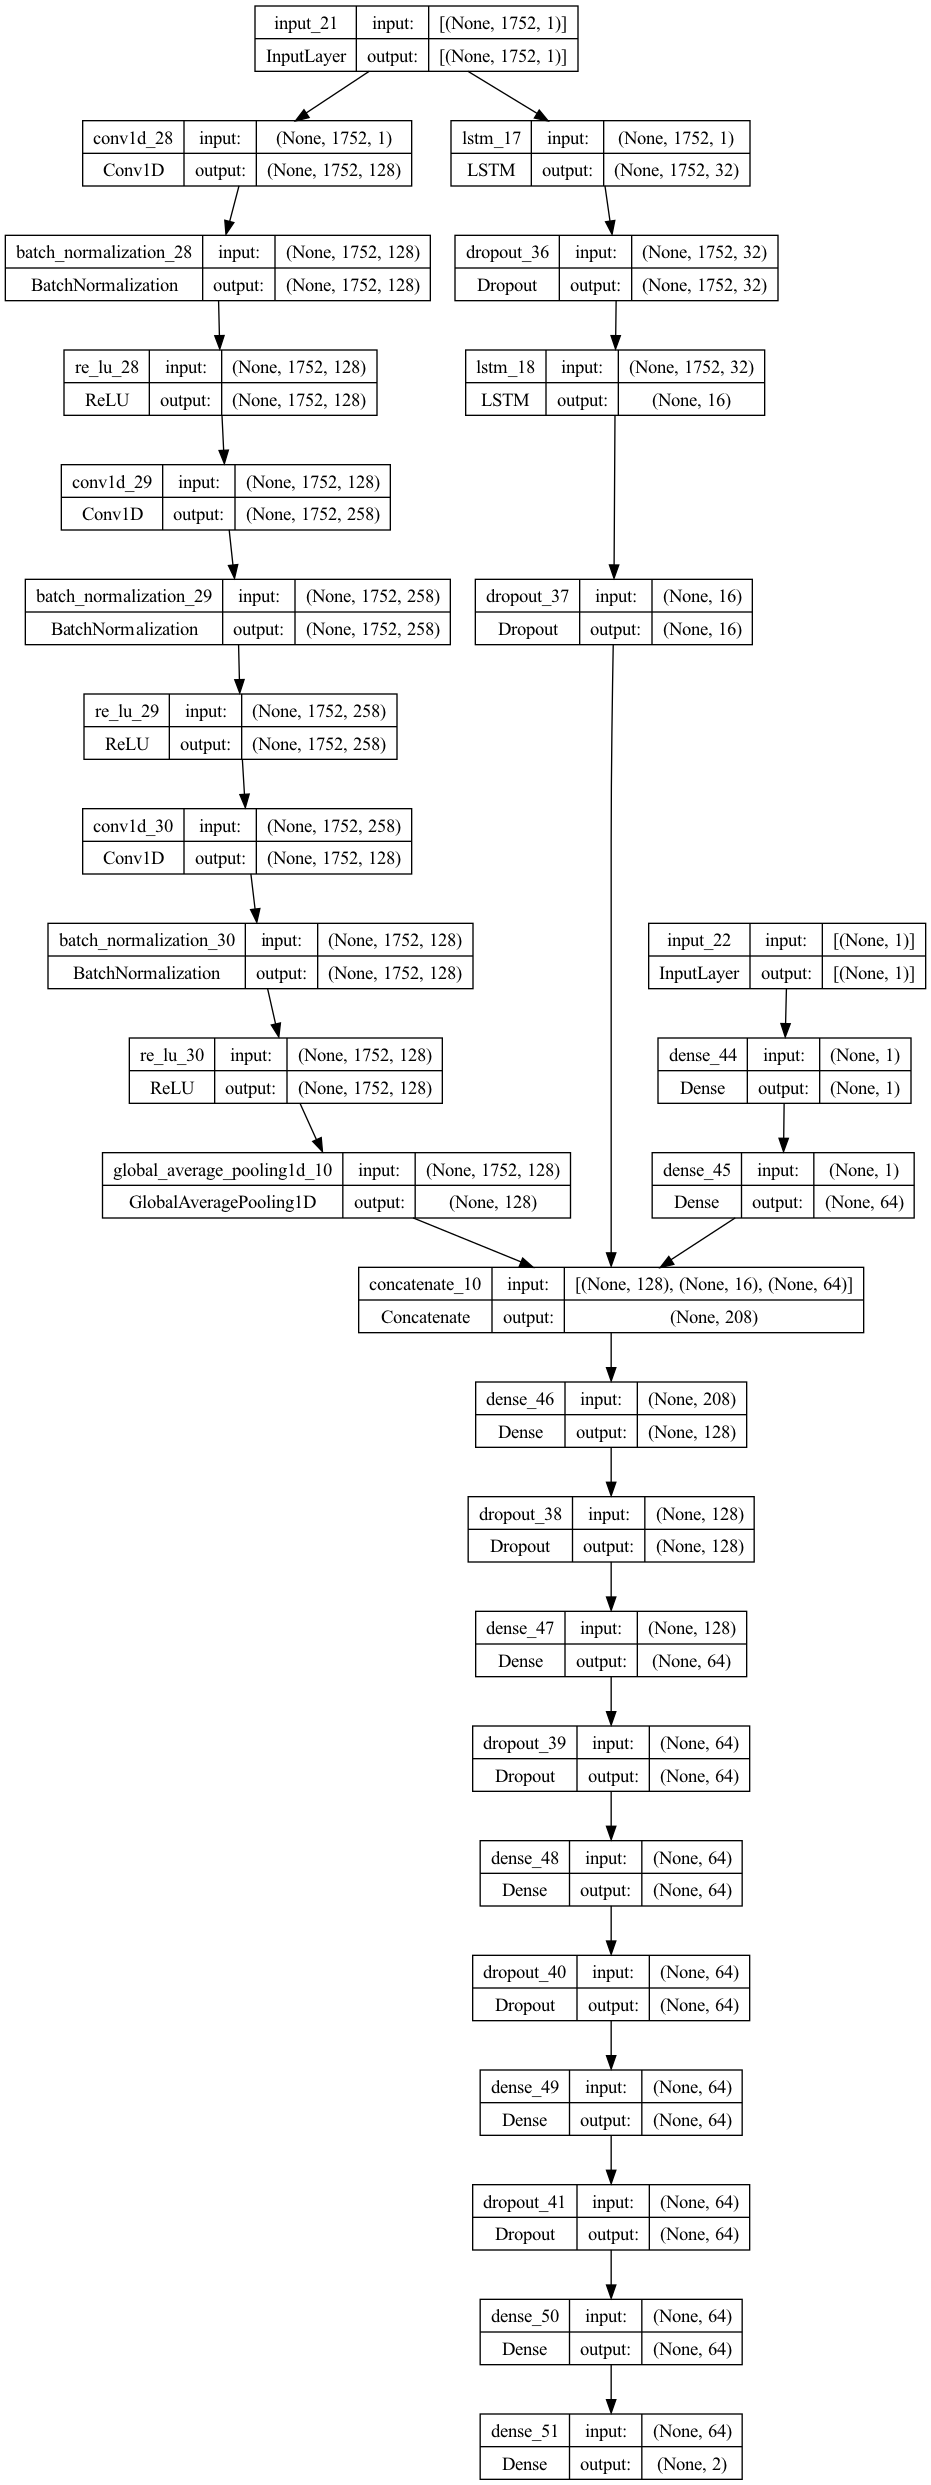

In [78]:
## Functional API with two inputs
Cc_input = layers.Input((input_dim, 1))
B0_input = layers.Input((1))

## Convolutional layer for CC
conv_layer = layers. Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(Cc_input)
conv_layer = layers.BatchNormalization()(conv_layer)
conv_layer = layers.ReLU()(conv_layer)

conv_layer = layers. Conv1D(258, 5, padding='same', kernel_initializer='he_uniform')(conv_layer)
conv_layer = layers.BatchNormalization()(conv_layer)
conv_layer = layers.ReLU()(conv_layer)

conv_layer = layers. Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(conv_layer)
conv_layer = layers.BatchNormalization()(conv_layer)
conv_layer = layers.ReLU()(conv_layer)

conv_layer = layers.GlobalAveragePooling1D()(conv_layer)

## LSTM layer for Cc
#lstm_layer = layers.Bidirectional(layers.LSTM(64, return_sequences=False))(Cc_input)
lstm_layer = layers.LSTM(32, return_sequences=True)(Cc_input)
lstm_layer = layers.Dropout(0.1)(lstm_layer)
lstm_layer = layers.LSTM(16, return_sequences=False)(lstm_layer)
lstm_layer = layers.Dropout(0.1)(lstm_layer)
# lstm_layer = layers.Bidirectional(layers.LSTM(8))(lstm_layer)


## B0 dense layer
B0_layer = layers.Dense(1, activation = 'relu')(B0_input)
B0_layer = layers.Dense(64, activation='relu')(B0_layer)

## Concatenate with the B0 input
concat_layer = layers.Concatenate()([conv_layer, lstm_layer, B0_layer])

## Hidden layer
hidden_layer = layers.Dense(128, activation = 'relu')(concat_layer)
hidden_layer = layers.Dropout(0.1)(hidden_layer)
hidden_layer = layers.Dense(64, activation = 'relu')(hidden_layer)
hidden_layer = layers.Dropout(0.1)(hidden_layer)
hidden_layer = layers.Dense(64, activation = 'relu')(hidden_layer)
hidden_layer = layers.Dropout(0.1)(hidden_layer)
hidden_layer = layers.Dense(64, activation = 'relu')(hidden_layer)
hidden_layer = layers.Dropout(0.1)(hidden_layer)
hidden_layer = layers.Dense(64, activation = 'relu')(hidden_layer)

## Output
output = layers.Dense(output_size, activation='sigmoid')(hidden_layer)

## Create model
model = keras.models.Model(inputs = [Cc_input, B0_input], outputs = output)
# model = keras.models.Model(inputs = [Cc_input], outputs = output)

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [89]:
model.compile(
  loss='binary_crossentropy',
  optimizer=keras.optimizers.Adam(learning_rate=0.00001),
  metrics=['acc']
)
tf.config.run_functions_eagerly(False)
history = model.fit(
    [X_train, b0_train], y_train,
    # X_train, y_train,
    epochs=50,
    batch_size=batch_size,
    validation_split=0.1,
    shuffle=True
)

## model.save('sims/classifier_model')

Epoch 1/50
56/56 [==============================] - 124s 2s/step - loss: 0.5984 - acc: 0.4315 - val_loss: 0.6372 - val_acc: 0.4167
Epoch 2/50
56/56 [==============================] - 153s 3s/step - loss: 0.5959 - acc: 0.4383 - val_loss: 0.6064 - val_acc: 0.4217
Epoch 3/50
56/56 [==============================] - 156s 3s/step - loss: 0.5956 - acc: 0.4481 - val_loss: 0.5897 - val_acc: 0.4192
Epoch 4/50
56/56 [==============================] - 152s 3s/step - loss: 0.5951 - acc: 0.4610 - val_loss: 0.5807 - val_acc: 0.4495
Epoch 5/50
56/56 [==============================] - 151s 3s/step - loss: 0.5944 - acc: 0.4604 - val_loss: 0.5757 - val_acc: 0.4571
Epoch 6/50
56/56 [==============================] - 157s 3s/step - loss: 0.5922 - acc: 0.4848 - val_loss: 0.5729 - val_acc: 0.4773
Epoch 7/50
56/56 [==============================] - 157s 3s/step - loss: 0.5908 - acc: 0.4618 - val_loss: 0.5706 - val_acc: 0.4949
Epoch 8/50
56/56 [==============================] - 158s 3s/step - loss: 0.5933 - a

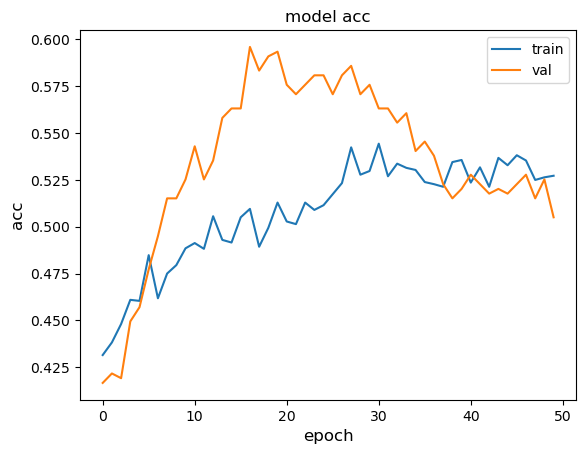

In [90]:
metric = "acc"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [91]:
np.max(history.history['acc'])

0.5443322062492371

In [92]:
np.max(history.history['val_acc'])

0.5959596037864685

In [93]:
model.predict([X_train, b0_train])

124/124 [==============================] - 34s 271ms/step


array([[0.41839558, 0.41458803],
       [0.22592613, 0.23302592],
       [0.89707047, 0.8737079 ],
       ...,
       [0.8316231 , 0.78698575],
       [0.7319574 , 0.6763493 ],
       [0.48128968, 0.49213746]], dtype=float32)

In [94]:
train_loss, train_acc = model.evaluate([X_train, b0_train], y_train)

test_loss, test_acc = model.evaluate([X_test, b0_test], y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

14/14 [==============================] - 4s 265ms/step - loss: 0.5502 - acc: 0.4773
Test accuracy 0.47727271914482117
Test loss 0.5501982569694519
